### 9.1 Model Evaluation

Metric: to quantify the performance of a constructed model
- e.g. accuracy, precision, $F_1$ score, Area Under the Receiver Operating Characteristic Curve (AUROC, or ROC AUC)

Rule: the procedure that is used to estimate a metric
- e.g. hold-out, resubstitution, cross-validation, bootstrap

#### 9.1.1 Model Evaluation Rules

- Hold-out estimator
- Resubstitution
- Bootstrap
- Cross-validation (CV)
  - Standard K-fold CV
  - Leave-one-out
  - Stratified K-fold CV
  - Shuffle and Split (Random Permutation CV)

##### Hold-out Estimator

- Split to training set ($l$) and test set ($m$), $l+m=n$
- Common to take $m \approx 0.25n$
- Its use in small sample (sample size with respect to feature size is relatively small) could be harmful for both the training stage and the evaluation process
- To remove the harmful impact of holding out a portion of $\mathbf{S}_{tr,n}$ for testing in small-sample is once $\hat{\epsilon}_h$ is obtained, we apply $\Psi$ to the entire dataset $\mathbf{S}_{tr,n}$ to train a classifier $\Psi_{n}(\mathbf{x})$ but still use  $\hat{\epsilon}_h$, which was estimated on $\mathbf{S}_{te,m}$ using  $\Psi_{l}(\mathbf{x})$, as the performance of  $\Psi_{n}(\mathbf{x})$

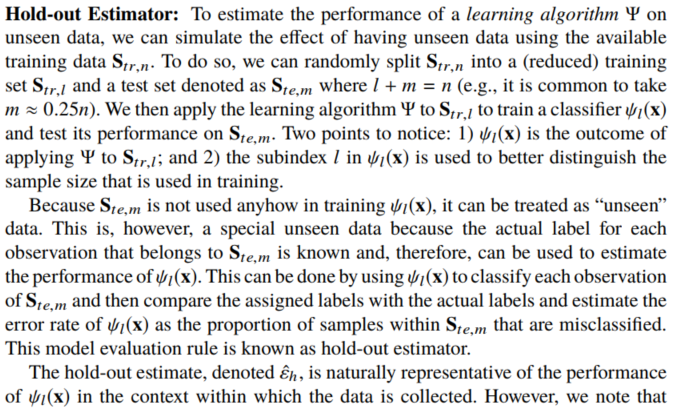

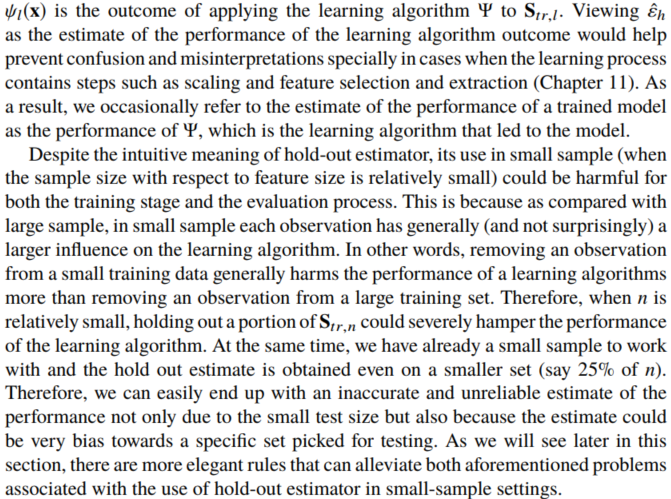

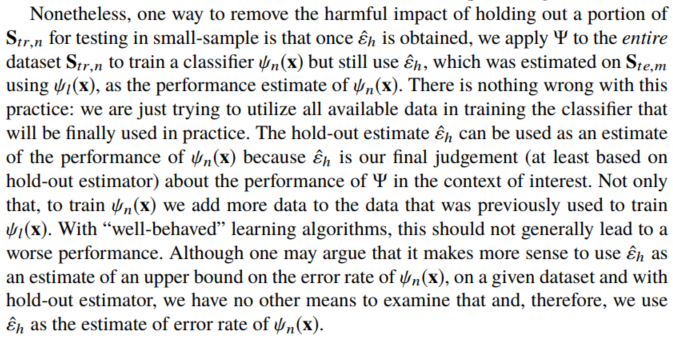

##### Resubstitution Estimator

- Evaluate the model on the same dataset that was used to train the model
- It can lead to overly optimistic estimates of model performance because it does not account for the model's ability to generalize to unseen data

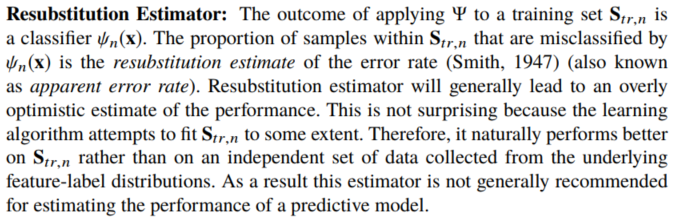

##### Bootstrap

- $B$ bootstrap samples, denoted $\mathbf{S}^{*}_{tr, n, k}, k=1,2,\dots,B$ are created by randomly drawing $n$ observations with replacements from $\mathbf{S}_{tr,n}$
- Treat the observations that do not appear in $\mathbf{S}^{*}_{tr, n, k}$ as test data for a model that is trained using $\mathbf{S}^{*}_{tr, n, k}$

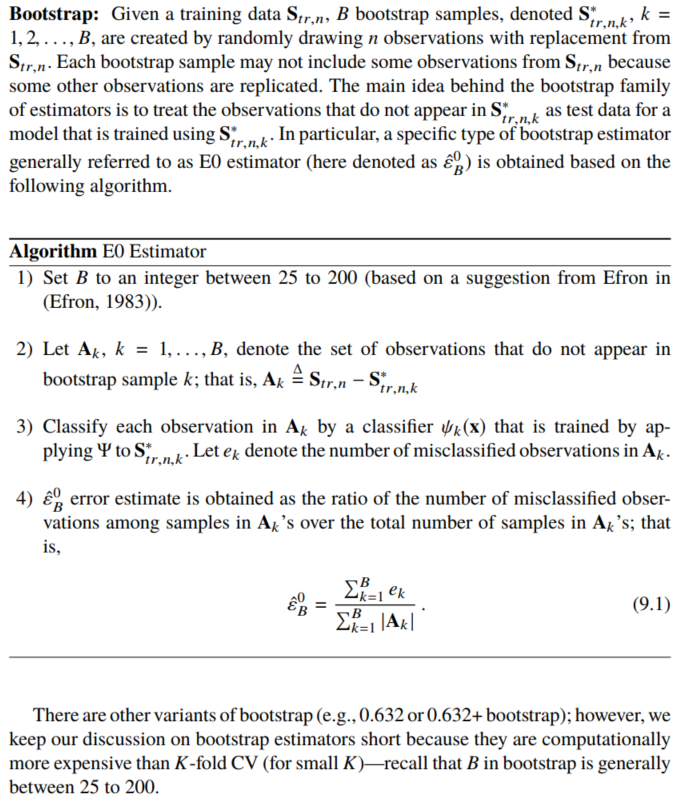

##### Cross-validation

**Standard K-fold CV**

Problems:
- The held-out folds (i.e. $\text{Fold}_1$ and $\text{Fold}_2$) only contain data from Class 0. This means the performance of the surrogate classifier is only relevant in predicting instances of Class 0
- To train a surrogate classifier, the training data may not include data from all classes, e.g. iteration 5

We can shuffle the data before dividing them into $K$ folds to alleviate the issue. However, to shuffle the data, we need to assume that samples within each class are i.i.d.

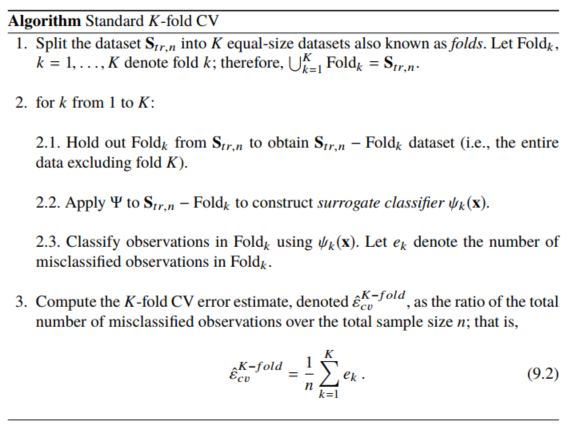

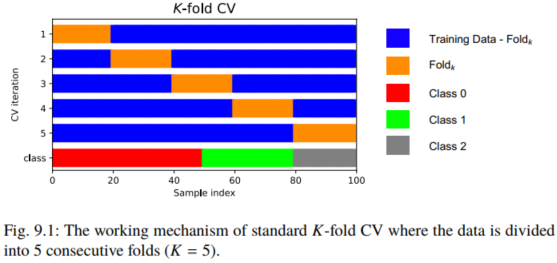

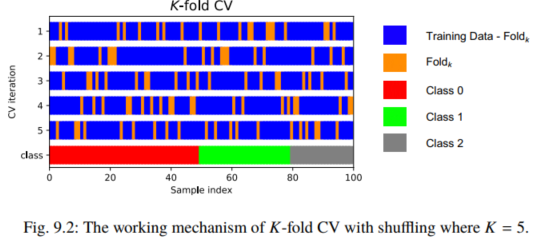

**Leave-one-out (loo)**
- $K=n$, the data is divided into $n$ folds where each fold contatins only one observation
- Feasible when $n$ is not large
- loo has larger variance, lower bias with respect to K-fold CV

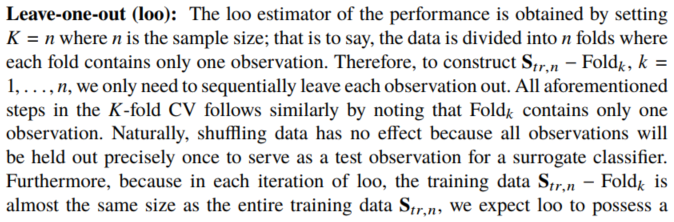

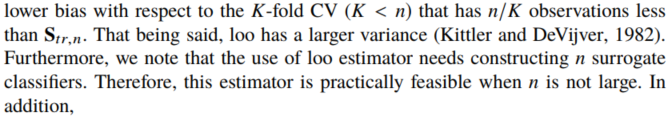

**Stratified K-fold CV**

- We should keep the proportion of samples from each class in the training set and the held out fold similar to the full training data

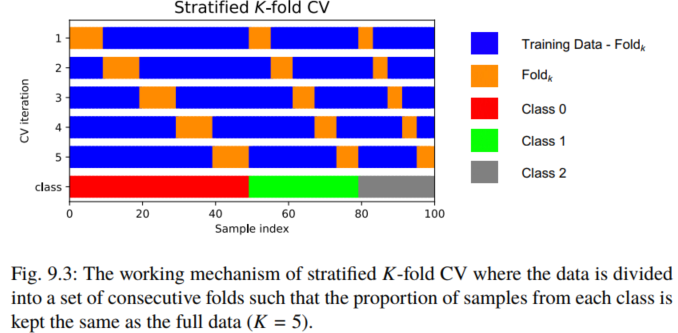

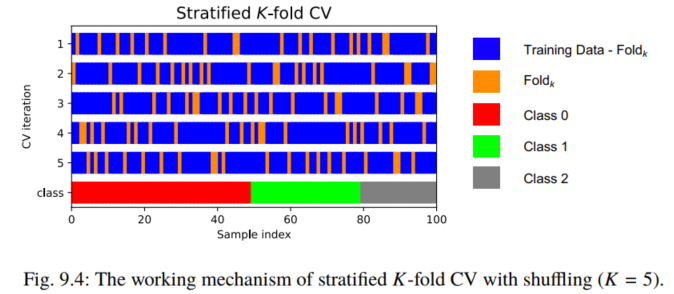

**Shuffle and Split (Random Permutation CV)**

Suppose we have a training dataset that is quite large in terms of sample size and, at the same time, we have a computationally intensive $\Psi$ to evaluate:
- We randomly choose a subset of the entire dataset for training and testing, and repeat this procedure $K$ times
- 50% training, 20% testing, 30% unused

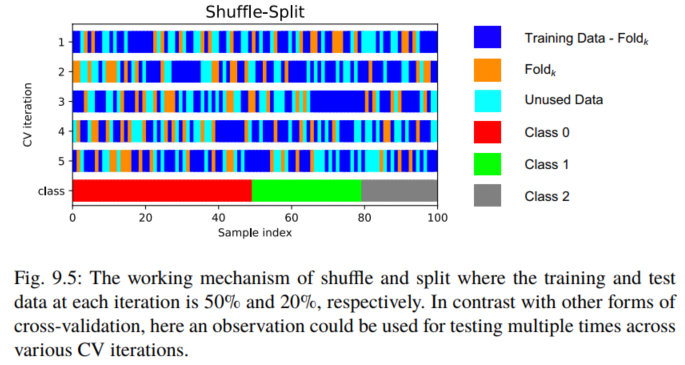

##### Example

K-fold CV

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN

# load training data
iris = datasets.load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: '+ str(y_test.shape) + '\n')

# to set up the K-fold CV splits
K_fold = 3
kfold = KFold(n_splits=K_fold, shuffle=True, random_state=42) # shuffling is used
cv_scores = np.zeros(K_fold)
knn = KNN()
for counter, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
  print("K-fold CV iteration " + str(counter+1))
  print("Train indices:", train_idx)
  print("Test indices:", test_idx, "\n")
  X_train_kfold = X_train[train_idx,]
  y_train_kfold = y_train[train_idx,]
  X_test_kfold = X_train[test_idx,]
  y_test_kfold = y_train[test_idx,]
  cv_scores[counter] = knn.fit(X_train_kfold, y_train_kfold).score(X_test_kfold, y_test_kfold)
  print("the accuracy of folds are: ", cv_scores)
  print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

K-fold CV iteration 1
Train indices: [  1   2   3   5   6   7   8  13  14  16  17  19  20  21  23  25  27  28
  29  32  33  34  35  37  38  39  41  43  46  48  49  50  51  52  54  57
  58  59  60  61  63  66  67  68  69  71  72  74  75  77  79  80  81  82
  83  84  85  86  87  90  92  93  94  95  98  99 100 101 102 103 105 106
 108 111 112 113 115 116 117 119]
Test indices: [  0   4   9  10  11  12  15  18  22  24  26  30  31  36  40  42  44  45
  47  53  55  56  62  64  65  70  73  76  78  88  89  91  96  97 104 107
 109 110 114 118] 

the accuracy of folds are:  [0.975 0.    0.   ]
the overall 3-fold CV accuracy is: 0.325
K-fold CV iteration 2
Train indices: [  0   1   2   4   9  10  11  12  14  15  18  20  21  22  23  24  26  29
  30  31  32  36  37  40  41  42  44  45  47  48  51  52  53  55  56  57
  58  59  60  61  62  63  64  65  70  71  73  74  75  76  78  79  81  82
  86  87  88  89  91  9

In [6]:
from sklearn.model_selection import cross_val_score
#kfold = KFold(n_splits=K_fold, shuffle=True, random_state=42) #  kfold is already instantiated from this line that we had before
knn = KNN()
cv_scores = cross_val_score(knn, X_train, y_train, cv=kfold)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.975 0.975 0.95 ]
the overall 3-fold CV accuracy is: 0.967


Stratified K-fold CV

In [9]:
# no shuffle by default
cv_scores = cross_val_score(knn, X_train, y_train, cv=3)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.925 0.95  1.   ]
the overall 3-fold CV accuracy is: 0.958


In [8]:
from sklearn.model_selection import StratifiedKFold
strkfold = StratifiedKFold(n_splits=K_fold, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=strkfold)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.925 1.    1.   ]
the overall 3-fold CV accuracy is: 0.975


Shuffle and Split (Random Permutation CV)

In [11]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=K_fold, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=strkfold)
print("the accuracy of folds are: ", cv_scores)
print("the overall 3-fold CV accuracy is: {:.3f}".format(cv_scores.mean()))

the accuracy of folds are:  [0.925 1.    1.   ]
the overall 3-fold CV accuracy is: 0.975


#### 9.1.2 Evaluation Metrics for Classification

#### 9.1.3 Evaluation Metrics for Regression

### 9.2 Model Selection

#### 9.2.1 Grid Search

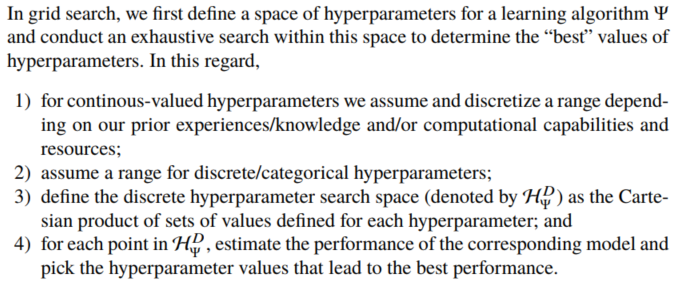

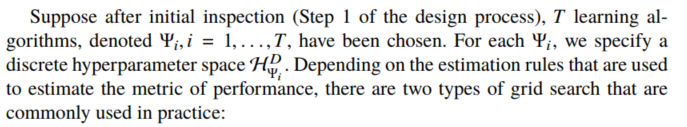

Two types of grid search that are commonly used in practice:
- grid search using validation set
- grid search using cross-validation 

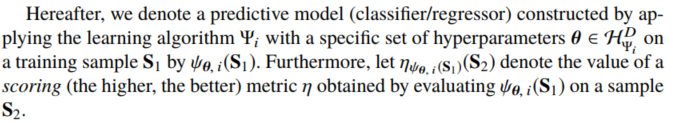

##### Grid search using validation set

- Split the dataset into training, validation, and test sets
- Validation set is used for model selection
- First 75:25 to training and test set, then use the same ratio to split the training set to training and validation set

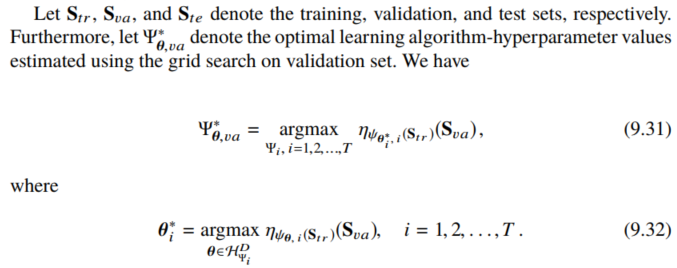

1. (9.32 )Find the optimal hyperparameters for each learning algorithm
2. (9.31) Find the optimal algorithm-hyperparameter

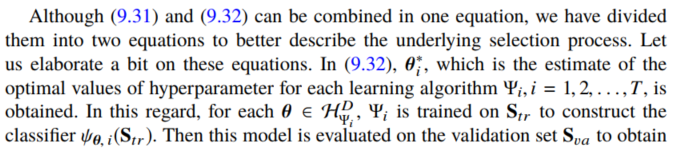

- We can combine $\mathbf{S}_{\text{tr}}$ and $\mathbf{S}_{\text{va}}$ to build a larger set
- The final model is trained by applying the estimated optimal learning algorithm-hyperparameter values $\Psi^{*}_{\mathbf{\theta}, \text{va}}$ to $\mathbf{S}_{\text{tr}} \cup \mathbf{S}_{\text{tr}}$

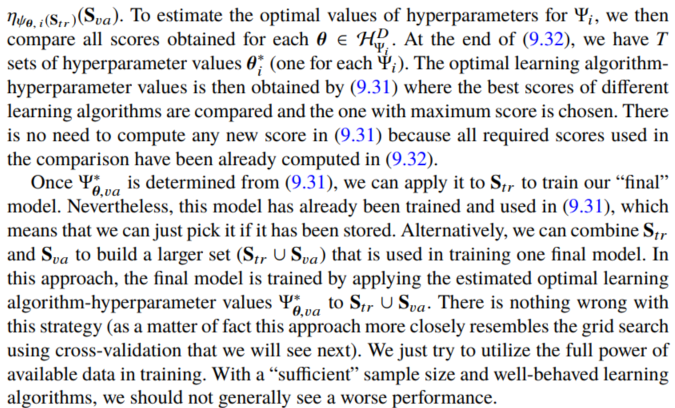

Once the final model is trained/selected, it can be applied on ${\mathbf{S}_\text{te}}$ for evaluation

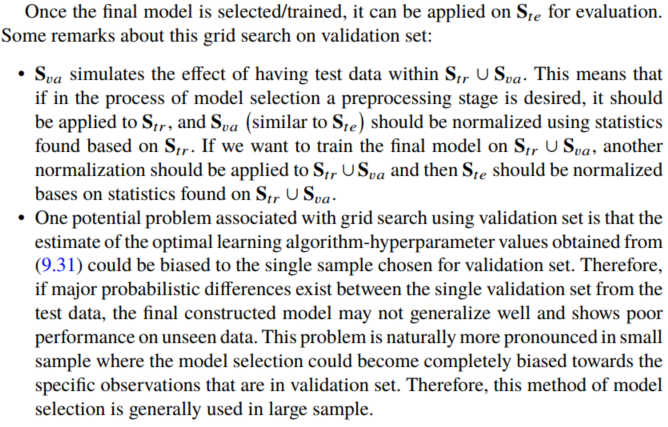

- This means that
if in the process of model selection a preprocessing stage is desired, it should
be applied to $\mathbf{S}_{\text{tr}}$, and $\mathbf{S}_{\text{va}}$
- This method of model selection is generally used in large sample

##### Grid search using cross-validation

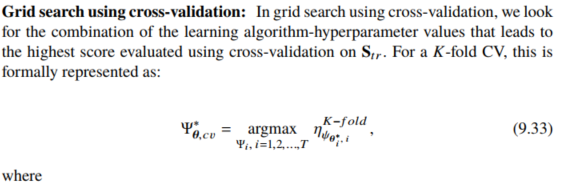

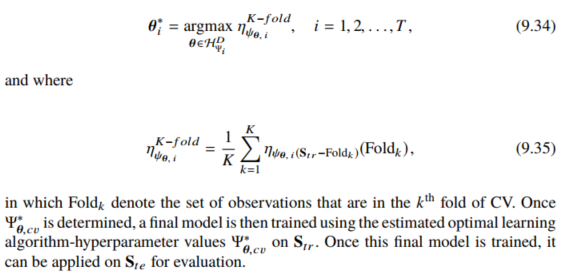

##### Example

In [15]:
# Grid search using cross-validation

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape) + '\n')
lrr = LRR(max_iter=2000)
grids = [{'penalty': ['l2'], 'C': [0.01, 0.1]},
{'penalty': ['elasticnet'], 'C': [0.01, 0.1], 'l1_ratio':[0.2, 0.8], 'solver':['saga']}]
strkfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gscv = GridSearchCV(lrr, grids, cv=strkfold, n_jobs=-1, scoring = ['accuracy', 'roc_auc_ovr_weighted'], refit='accuracy')
score_best_estimator = gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)
df

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

the highest score is: 0.950
the best hyperparameter combination is: {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}
the accuracy of the best estimator on the test data is: 0.967


mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.011147      0.000484         0.008864        0.000469     0.01   
1       0.018358      0.001242         0.009013        0.000004     0.10   
2       0.012007      0.007791         0.009180        0.000941     0.01   
3       0.003838      0.001171         0.008495        0.000816     0.01   
4       0.033370      0.002801         0.005841        0.001956     0.10   
5       0.022512      0.002040         0.009370        0.001031     0.10   

  param_penalty  param_l1_ratio param_solver  \
0            l2             NaN          NaN   
1            l2             NaN          NaN   
2    elasticnet             0.2         saga   
3    elasticnet             0.8         saga   
4    elasticnet             0.2         saga   
5    elasticnet             0.8         saga   

                                              params  split0_test_accuracy  \
0                       {'C': 0.01, 'penalty': 'l2'}                 0.800   
1                        {'C': 0.1, 'penalty': 'l2'}                 0.875   
2  {'C': 0.01, 'l1_ratio': 0.2, 'penalty': 'elast...                 0.675   
3  {'C': 0.01, 'l1_ratio': 0.8, 'penalty': 'elast...                 0.325   
4  {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti...                 0.900   
5  {'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasti...                 0.900   

   ...  split2_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0  ...                 0.875            0.833333           0.031180   
1  ...                 0.975            0.941667           0.047140   
2  ...                 0.800            0.750000           0.054006   
3  ...                 0.325            0.325000           0.000000   
4  ...                 0.975            0.950000           0.035355   
5  ...                 0.950            0.941667           0.031180   

   rank_test_accuracy  split0_test_roc_auc_ovr_weighted  \
0                   4                          0.964850   
1                   2                          0.982977   
2                   5                          0.917575   
3                   6                          0.500000   
4                   1                          0.988675   
5                   2                          0.985844   

   split1_test_roc_auc_ovr_weighted  split2_test_roc_auc_ovr_weighted  \
0                          0.965705                          0.973148   
1                          0.999074                          0.998148   
2                          0.864797                          0.890741   
3                          0.500000                          0.500000   
4                          1.000000                          1.000000   
5                          0.999056                          0.998148   

   mean_test_roc_auc_ovr_weighted  std_test_roc_auc_ovr_weighted  \
0                        0.967901                       0.003727   
1                        0.993400                       0.007380   
2                        0.891038                       0.021547   
3                        0.500000                       0.000000   
4                        0.996225                       0.005339   
5                        0.994349                       0.006026   

   rank_test_roc_auc_ovr_weighted  
0                               4  
1                               3  
2                               5  
3                               6  
4                               1  
5                               2  

[6 rows x 21 columns]

In [17]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, PredefinedSplit
iris = datasets.load_iris()
X, X_test, y, y_test= train_test_split(iris.data, iris.target, random_state=100, stratify=iris.target)
indices = np.arange(len(X))
X_train, X_val, y_train, y_val, indices_train, indices_val=train_test_split(X, y, indices, random_state=100, stratify=y)
ps_ind = np.zeros(len(indices), dtype='int_')
ps_ind[indices_train] = -1 # training set indices are set to -1 and validation set indices are left as 0
print('indices used in CV splitter:\n', ps_ind)
pds = PredefinedSplit(ps_ind)
print('the split used as training and validation sets:\n', *pds.split())
lrr = LRR(max_iter=2000)
grids = [{'penalty': ['l2'], 'C': [0.01, 0.1]},
{'penalty': ['elasticnet'], 'C': [0.01, 0.1], 'l1_ratio':[0.2, 0.8], 'solver':['saga']}]
gscv = GridSearchCV(lrr, grids, cv=pds, n_jobs=-1, scoring =['accuracy', 'roc_auc_ovr_weighted'], refit='accuracy')
score_best_estimator=gscv.fit(X, y).score(X_test, y_test) #gscv is fit on X = X_train+X_val
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)
df

indices used in CV splitter:
 [-1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1  0 -1  0 -1 -1 -1
  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1  0 -1
  0 -1  0  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1]
the split used as training and validation sets:
 (array([  0,   1,   2,   3,   4,   5,   6,  10,  11,  13,  14,  15,  16,
        18,  19,  20,  22,  23,  24,  25,  26,  27,  28,  30,  31,  32,
        33,  34,  35,  38,  39,  41,  43,  45,  46,  47,  49,  51,  53,
        54,  55,  57,  58,  59,  61,  62,  64,  65,  66,  67,  69,  71,
        73,  76,  77,  78,  80,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  98,  99, 100, 101, 103, 105,
       106, 107, 108, 109, 110, 111]), array([  7,   8,   9,  12,  17,  21,  29,  36,  37,  40,  42,  44,  48,
        50,  52,  56,  60,  63,  68

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
0       0.013520           0.0         0.008503             0.0     0.01   
1       0.022011           0.0         0.011539             0.0     0.10   
2       0.004987           0.0         0.008528             0.0     0.01   
3       0.004011           0.0         0.008507             0.0     0.01   
4       0.036024           0.0         0.008847             0.0     0.10   
5       0.022019           0.0         0.010490             0.0     0.10   

  param_penalty  param_l1_ratio param_solver  \
0            l2             NaN          NaN   
1            l2             NaN          NaN   
2    elasticnet             0.2         saga   
3    elasticnet             0.8         saga   
4    elasticnet             0.2         saga   
5    elasticnet             0.8         saga   

                                              params  split0_test_accuracy  \
0                       {'C': 0.01, 'penalty': 'l2'}              0.821429   
1                        {'C': 0.1, 'penalty': 'l2'}              0.857143   
2  {'C': 0.01, 'l1_ratio': 0.2, 'penalty': 'elast...              0.785714   
3  {'C': 0.01, 'l1_ratio': 0.8, 'penalty': 'elast...              0.321429   
4  {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'elasti...              0.857143   
5  {'C': 0.1, 'l1_ratio': 0.8, 'penalty': 'elasti...              0.892857   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
0            0.821429                0.0                   4   
1            0.857143                0.0                   2   
2            0.785714                0.0                   5   
3            0.321429                0.0                   6   
4            0.857143                0.0                   2   
5            0.892857                0.0                   1   

   split0_test_roc_auc_ovr_weighted  mean_test_roc_auc_ovr_weighted  \
0                          0.921575                        0.921575   
1                          0.961257                        0.961257   
2                          0.873538                        0.873538   
3                          0.500000                        0.500000   
4                          0.970969                        0.970969   
5                          0.978697                        0.978697   

   std_test_roc_auc_ovr_weighted  rank_test_roc_auc_ovr_weighted  
0                            0.0                               4  
1                            0.0                               3  
2                            0.0                               5  
3                            0.0                               6  
4                            0.0                               2  
5                            0.0                               1

#### 9.2.2 Random Search

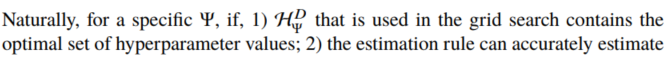

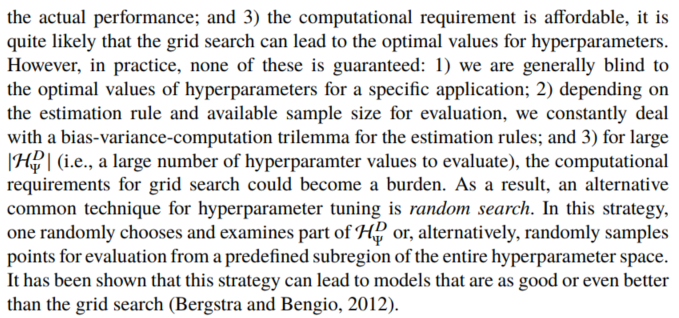

In [19]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LRR
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from scipy.stats import loguniform, uniform
iris = datasets.load_iris()
X_train = iris.data
y_train = iris.target
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=100, test_size=0.2, stratify=iris.target)
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
+ '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape) + '\n')
lrr = LRR(max_iter=2000)
distrs = [{'penalty': ['l2'], 'C': loguniform(0.01, 100)},
{'penalty': ['elasticnet'], 'C': loguniform(0.01, 100),'l1_ratio':uniform(0, 1), 'solver':['saga']}]
strkfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
gscv = RandomizedSearchCV(lrr, distrs, cv=strkfold, n_jobs=-1, scoring= ['accuracy', 'roc_auc_ovr_weighted'], refit='accuracy', n_iter=10, random_state=42)
score_best_estimator=gscv.fit(X_train, y_train).score(X_test, y_test)
print('the highest score is: {:.3f}'.format(gscv.best_score_))
print('the best hyperparameter combination is: {}'.format(gscv.best_params_))
print('the accuracy of the best estimator on the test data is: {:.3f}'.format(score_best_estimator))
df = pd.DataFrame(gscv.cv_results_)
df.iloc[:,4:9]

X_train_shape: (120, 4)
X_test_shape: (30, 4)
y_train_shape: (120,)
y_test_shape: (30,)

the highest score is: 0.983
the best hyperparameter combination is: {'C': 2.7964859516062464, 'l1_ratio': 0.007066305219717406, 'penalty': 'elasticnet', 'solver': 'saga'}
the accuracy of the best estimator on the test data is: 0.967


param_C param_penalty  param_l1_ratio param_solver  \
0  15.352247            l2             NaN          NaN   
1   8.471801            l2             NaN          NaN   
2   2.440061            l2             NaN          NaN   
3   0.042071    elasticnet        0.058084         saga   
4   0.216189    elasticnet        0.142867         saga   
5   0.012088            l2             NaN          NaN   
6   7.726718    elasticnet        0.938553         saga   
7   0.053370    elasticnet        0.183405         saga   
8   2.796486    elasticnet        0.007066         saga   
9   0.146190            l2             NaN          NaN   

                                              params  
0         {'C': 15.352246941973492, 'penalty': 'l2'}  
1          {'C': 8.471801418819979, 'penalty': 'l2'}  
2          {'C': 2.440060709081755, 'penalty': 'l2'}  
3  {'C': 0.042070539502879395, 'l1_ratio': 0.0580...  
4  {'C': 0.21618942406574443, 'l1_ratio': 0.14286...  
5       {'C': 0.012087541473056965, 'penalty': 'l2'}  
6  {'C': 7.726718477963439, 'l1_ratio': 0.9385527...  
7  {'C': 0.053370327626039576, 'l1_ratio': 0.1834...  
8  {'C': 2.7964859516062464, 'l1_ratio': 0.007066...  
9        {'C': 0.14618962793704965, 'penalty': 'l2'}